In [1]:
#Update the requirement library
#Import the library
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange,uniform
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.model_selection import train_test_split



In [2]:
##Current working directory###
os.getcwd()



'C:\\Users\\hp'

In [3]:
#Set working directory#
os.chdir("C:/Users/hp/Desktop/LR")

In [4]:
#Loading data from set working directory
data_bike = pd.read_csv("day.csv")


In [24]:
data_bike.head()

,dteday,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,6,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,2,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,3,1,0.226957,0.436957,0.186900,1600


In [25]:
data_bike.tail()

,dteday,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
726,2012-12-27,1,1,12,4,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,5,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,6,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,1,0.255833,0.483333,0.350754,1796
730,2012-12-31,1,1,12,1,2,0.215833,0.577500,0.154846,2729


In [6]:
#Exploratory data analysis## Data preprocessing-- it is a technique where we are going to clean,#
#represent and analyse the data through graphs and this process is known as EDA(explotary data analysis)#

import sweetviz
import pandas as pd
from pandas_profiling import ProfileReport
data_bike = pd.read_csv("day.csv")
print(data_bike)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

In [7]:
#Generate report
profile = ProfileReport(data_bike)
profile.to_file(output_file="data_bike.html")


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [8]:
#From explotary data analysis,we can easily analyse that we can change some of the terms into categorical variable#
#like month,working day,weathersit.#
#We can also analyse that we can drop few terms like instant,casual,registered because of no use for analyse of my further data.#
data_bike['season']= data_bike['season'].astype('category')
data_bike['yr']=data_bike['yr'].astype('int')

data_bike['mnth']=data_bike['mnth'].astype('category')
data_bike['holiday']=data_bike['holiday'].astype('int')
data_bike['workingday']=data_bike['workingday'].astype('int')
data_bike['weekday']=data_bike['weekday'].astype('category')
data_bike['weathersit']=data_bike['weathersit'].astype('category')
d1=data_bike['dteday'].copy()

data_bike['dteday']=d1
data_bike['dteday']=data_bike['dteday'].astype('category')

In [9]:
data_bike.dtypes

instant          int64
dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [10]:
#Few of the data are of no use.so,we should drop it#
data_bike = data_bike.drop(['instant','casual', 'registered'],axis=1)

In [11]:
data_bike.dtypes

dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [12]:
#Missing value analysis##
missing_val = pd.DataFrame()
missing_val

""


In [13]:
#To analyse sum of missing value#
data_bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [14]:
data_bike.shape

(731, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x25898a9b358>,
 'caps': [<matplotlib.lines.Line2D at 0x25898a9b908>,
 'boxes': [<matplotlib.lines.Line2D at 0x25898a9b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x25898a9beb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25898aab1d0>],
 'means': []}

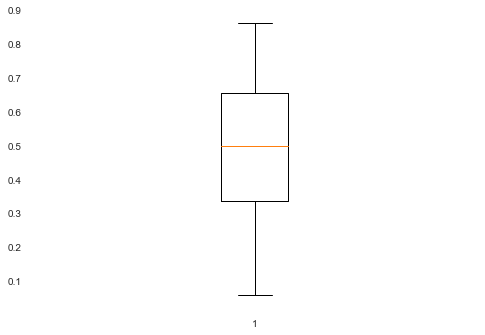

In [15]:
#Outlier Analysis#
#Outlier is used for inconsistent data that is present in my data. An outlier is used for continuous variable.#

#saving numeric values#
cnames=["temp","atemp","hum","windspeed",]
#ploting boxplot to visualize outliers#
plt.boxplot(data_bike['temp'])


{'whiskers': [<matplotlib.lines.Line2D at 0x25897924518>,
 'caps': [<matplotlib.lines.Line2D at 0x25897924ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25897924630>],
 'medians': [<matplotlib.lines.Line2D at 0x2589792fe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2589792fef0>],
 'means': []}

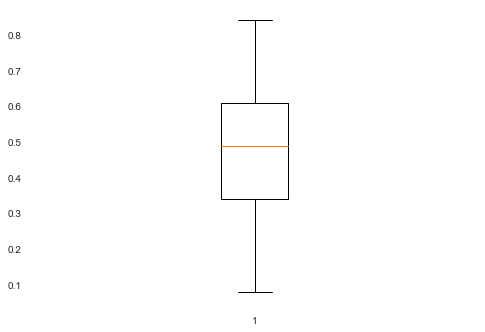

In [16]:
plt.boxplot(data_bike['atemp'])


{'whiskers': [<matplotlib.lines.Line2D at 0x25897865390>,
 'caps': [<matplotlib.lines.Line2D at 0x258978570b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25897865518>],
 'medians': [<matplotlib.lines.Line2D at 0x2589787fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2589787fcf8>],
 'means': []}

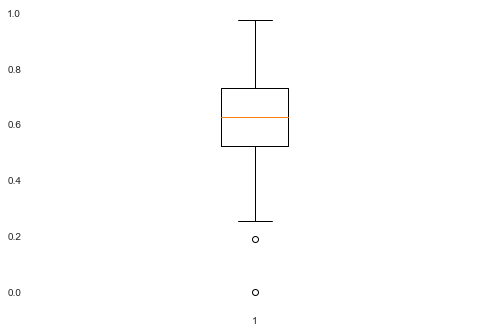

In [17]:
plt.boxplot(data_bike['hum'])


{'whiskers': [<matplotlib.lines.Line2D at 0x258966e56d8>,
 'caps': [<matplotlib.lines.Line2D at 0x258966e5278>,
 'boxes': [<matplotlib.lines.Line2D at 0x258966e5978>],
 'medians': [<matplotlib.lines.Line2D at 0x258966d1eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x258966d1438>],
 'means': []}

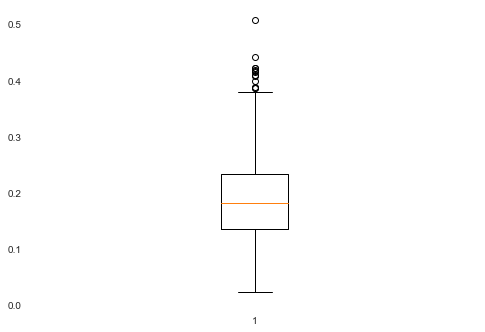

In [18]:
plt.boxplot(data_bike['windspeed'])

# Feature selection
#Since our data is continuous variable so we can go with correaltion test.#
#As i know chi square test is for categorical value and t test is used for numerical value#
df_corr = data_bike
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)



<AxesSubplot:>

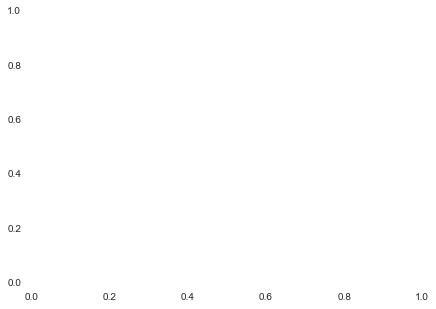

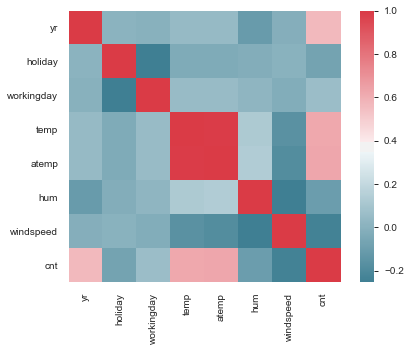

In [19]:
df_corr = data_bike
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# As we can see that two of variables are relevant that is temp and atemp and they are related to each other
#so we can remove temp and atemp because these variables contains nearly equal information.




In [20]:
# Feature scaling = it is done by remove unwanted variables.
#droping corelated variable
#Removing holiday and working day because they are not contributing much to the data
data_bike= data_bike.drop(['atemp'],axis=1)
data_bike =data_bike.drop(['holiday','workingday'],axis=1) 

# Modeling
#Since we are going to analyse data according to seasonal and environment settings and 
#we can analyse that our data is in continuous mode.
#So,we will go through regression model
# Regression model that we will use here that is decisison tree,random forest and linear regression.
#As the data divides into two variable seasonal and environmental.
#So,Models built are c50 (data is in two variable seasonal and environment)
#Random forest will also use.
#Linear regresssion will also use.


In [21]:
#c50 will divide the data into train and test
#dividing data into train and test
X = data_bike.values[:,1:9]
Y = data_bike.values[:,9]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor

#RF_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
RF_model.fit(X_train, X_test);

# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [23]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.71 %.


In [ ]:
#Random Forect Model hs been developed and result calculated.#
#it means that our model is 85.71 percent classified based on our testdata#